In [6]:
import torchvision
from fastai import *
from fastai.vision import *
from skimage.io import imread, imshow

In [7]:
class Colors(Dataset):
    def __init__(self, seed, size):
        red=np.stack([np.ones((224,224)), np.zeros((224,224)), np.zeros((224,224))], axis=0).astype(np.float32)
        blue=np.stack([np.zeros((224,224)), np.zeros((224,224)), np.ones((224,224))], axis=0).astype(np.float32)
        self.cards = [red, blue]
        np.random.seed(seed)
        self.size = size
        self.list = np.random.random(size)

    def __getitem__(self, index):
        cat = int(self.list[index]>.5)
        return self.cards[cat], cat
    
    def __len__(self):
        return self.size

dltrain = DataLoader(Colors(0, 500), batch_size=8)
dlvalid = DataLoader(Colors(1, 50), batch_size=8)
db = ImageDataBunch(dltrain, dlvalid)
db.c = 2

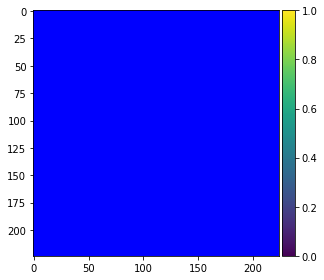

In [8]:
imshow(db.train_ds[0][0].transpose(1,2,0))

In [9]:
learn = create_cnn(db, arch=torchvision.models.vgg16_bn, metrics=accuracy, loss_func=F.cross_entropy)

In [10]:
learn.fit_one_cycle(1, .01)

epoch,train_loss,valid_loss,accuracy
1,0.018219,0.002794,1.000000
